Problem Statement
----------------------------

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


In [4]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error 

In [5]:
# Importing Warning Packages

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
# Importing the given data to Understand
# Houseprice = hp

hp_data = pd.read_csv('train.csv')
hp_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [7]:
hp_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [8]:
#Checking the info 
hp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
hp_data.shape

(1460, 81)

In [10]:
hp_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
                 ... 
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Functional          7
Fireplaces          4
FireplaceQu         5
GarageType          6
GarageYrBlt        97
GarageFinish        3
GarageCars          5
GarageArea        441
GarageQual          5
GarageCond          5
PavedDrive

In [11]:
#To check the null values

hp_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [12]:
round(hp_data.isnull().sum()/len(hp_data.index),2).sort_values(ascending=False).head(30)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageType      0.06
GarageCond      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
BsmtFinType1    0.03
BsmtExposure    0.03
BsmtCond        0.03
BsmtQual        0.03
BsmtFinType2    0.03
MasVnrArea      0.01
MasVnrType      0.01
Exterior2nd     0.00
Exterior1st     0.00
OverallCond     0.00
ExterQual       0.00
ExterCond       0.00
Foundation      0.00
RoofMatl        0.00
RoofStyle       0.00
YearRemodAdd    0.00
YearBuilt       0.00
SalePrice       0.00
OverallQual     0.00
dtype: float64

In [13]:
# Checking the value counts from data

hp_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [14]:
hp_data.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [15]:
hp_data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [16]:
hp_data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [17]:
# Null values

df_missing=pd.DataFrame((round(100*(hp_data.isnull().sum()/len(hp_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [18]:
hp_data['MiscFeature']=hp_data['MiscFeature'].fillna('None')
hp_data['Fence']=hp_data['Fence'].fillna('No_fence')
hp_data['PoolQC']=hp_data['PoolQC'].fillna('No_Pool')

In [19]:
hp_data['FireplaceQu']=hp_data['FireplaceQu'].fillna('No_Fireplace')
hp_data['Alley']=hp_data['Alley'].fillna('No_Alley')

In [20]:
hp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [21]:
hp_data['GarageYrBlt'] = hp_data['GarageYrBlt'].fillna(0)
hp_data['Electrical'] = hp_data['Electrical'].fillna('other')
hp_data['MasVnrArea'] = hp_data['MasVnrArea'].fillna(0)
hp_data['GarageFinish'] = hp_data['GarageFinish'].fillna(0)

In [22]:
#Dropping out few columns which has more NULL values

hp_data.drop("LotFrontage", axis=1, inplace=True)

# Removing NaN values

for col in('GarageFinish', 'GarageType', 'GarageQual', 'GarageCond'):
    hp_data[col] = hp_data[col].fillna('No_Garage')


In [23]:
hp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

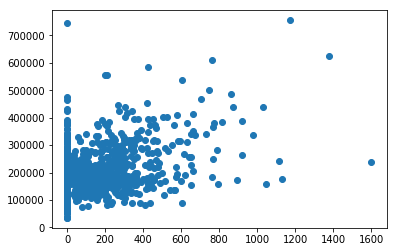

In [24]:
# EDA, Univariate and Bi-Variate Analysis

plt.scatter(hp_data.MasVnrArea, hp_data.SalePrice)

Text(0.5,1,'Msvr Area')

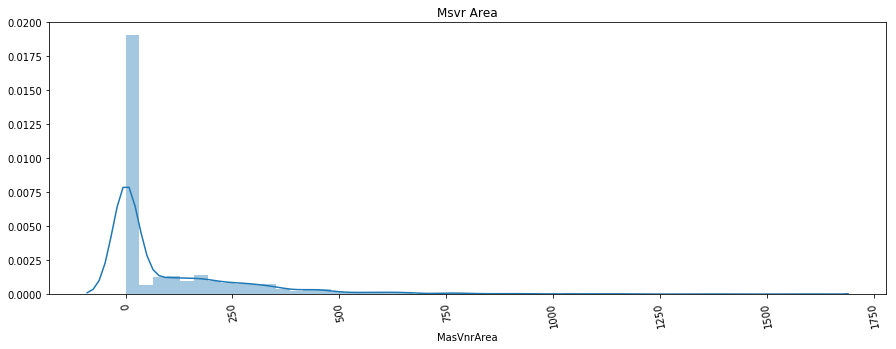

In [25]:
# Plotting a distplt

plt.figure(figsize = (15, 5))
sns.distplot(hp_data['MasVnrArea']).tick_params(axis = 'x', rotation = 100)
plt.title('Msvr Area')
#sns.distplot(hp_data['SalePrice'])

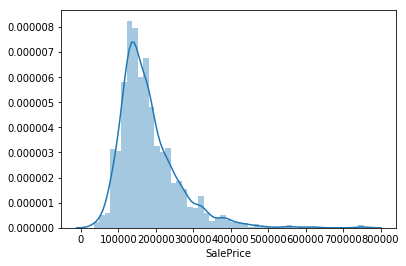

In [26]:
sns.distplot(hp_data['SalePrice'])

In [27]:
print("skewness: %f" %hp_data['SalePrice'].skew())
print("Kurtosis: %f" %hp_data['SalePrice'].kurt())

skewness: 1.882876
Kurtosis: 6.536282


Text(0.5,1,'Over_all_Cond')

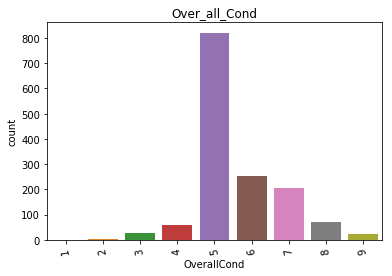

In [28]:

sns.countplot(x='OverallCond', data = hp_data).tick_params(axis = 'x', rotation = 100)
plt.title('Over_all_Cond')

Text(0.5,1,'Basement_cond')

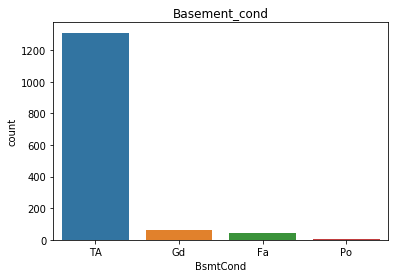

In [29]:
# Verifying outliers and counts
sns.countplot(x='BsmtCond', data = hp_data)
plt.title('Basement_cond')

Text(0.5,1,'SalePrice vs GrLivArea')

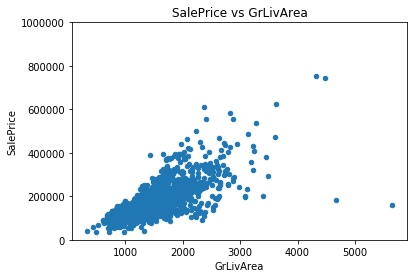

In [30]:
# Scatter Plot on difference of Saleprice and GrLivArea
# Used ylim function in pyplot module in matplotlib library
data = pd.concat([hp_data['SalePrice'], hp_data['GrLivArea']], axis = 1)
data.plot.scatter(x = 'GrLivArea', y = 'SalePrice', ylim = (0, 1000000));
plt.title('SalePrice vs GrLivArea')

# Outliers

#sns.boxplot(x='SalePrice', data = hp_data)

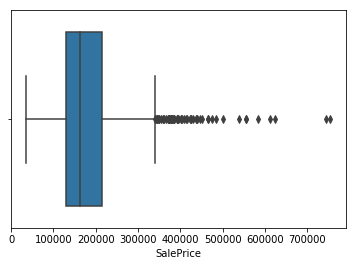

In [31]:
# Outliers

sns.boxplot(x='SalePrice', data = hp_data)

Text(0.5,1,'SalePrice vs Overall Quality')

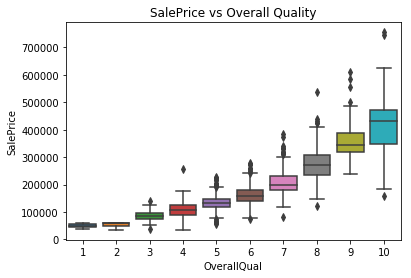

In [32]:
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = hp_data)
plt.title('SalePrice vs Overall Quality')

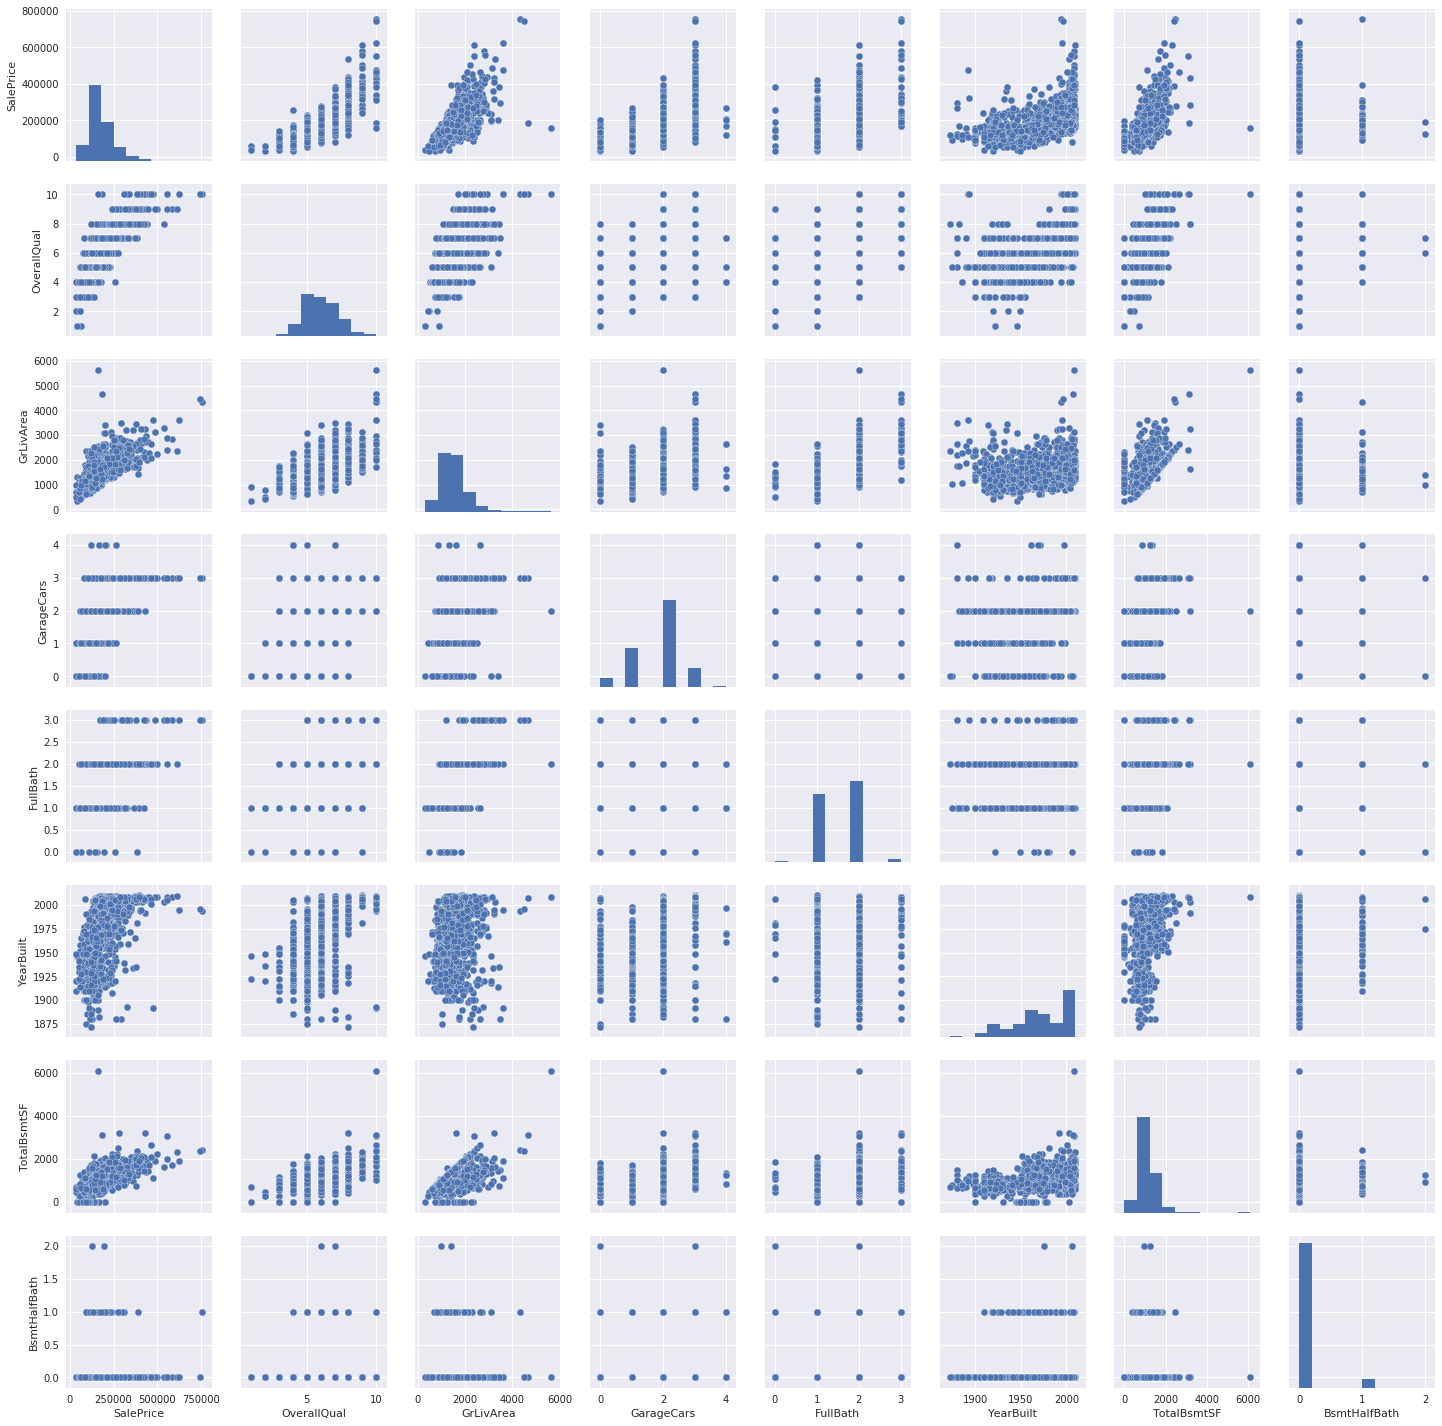

In [33]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt', 'TotalBsmtSF', 'BsmtHalfBath']
sns.pairplot(hp_data[cols], size = 2.5)
plt.show();

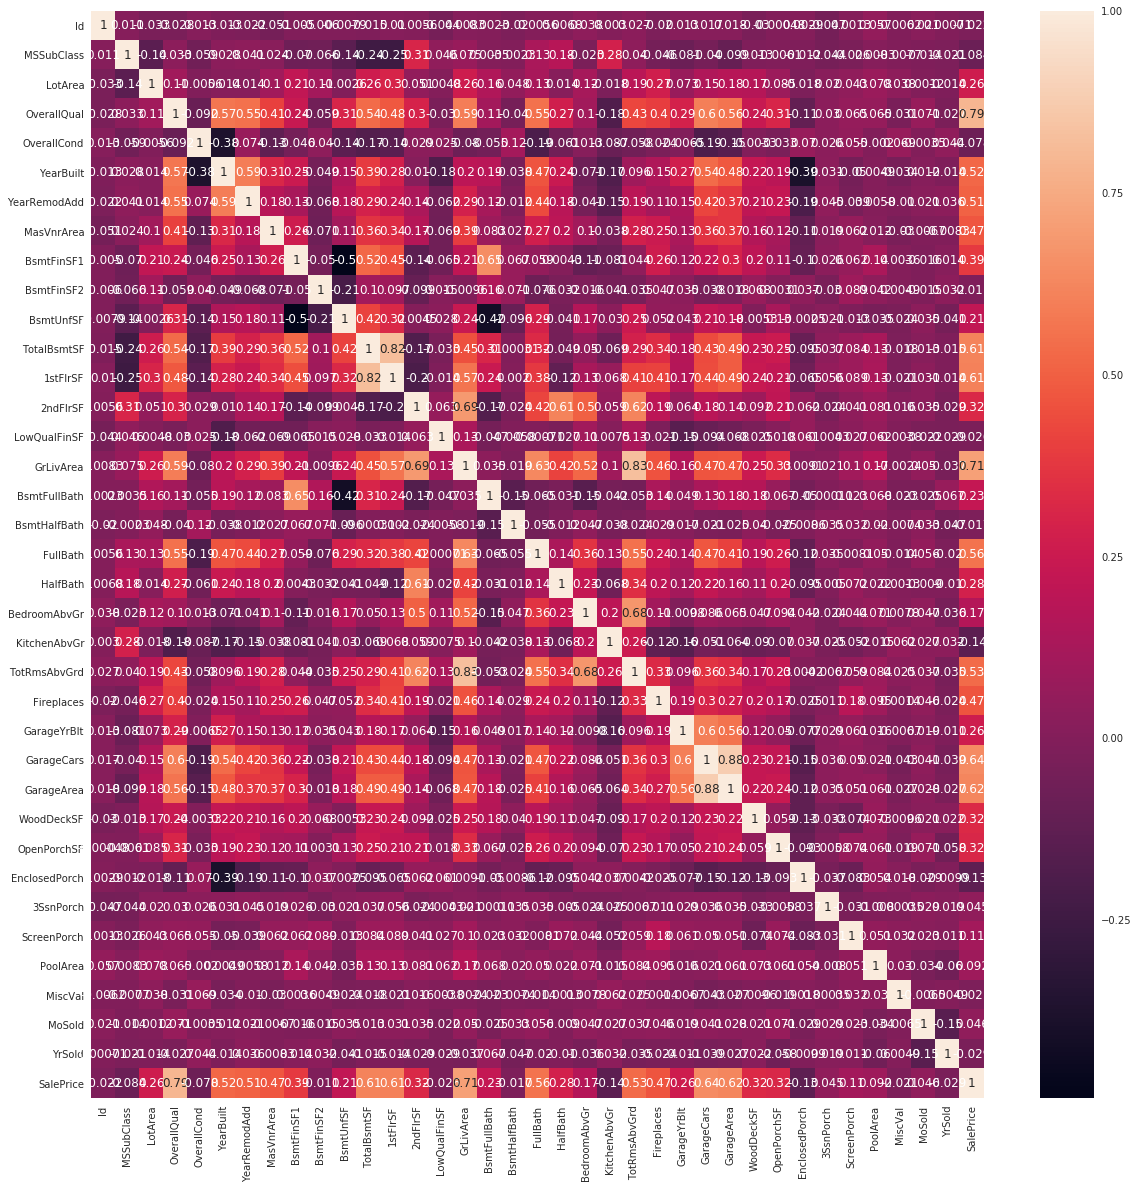

In [34]:
# Checking the correlation between variables using heatmap

plt.figure(figsize = (20, 20))
sns.heatmap(hp_data[list(hp_data.dtypes[hp_data.dtypes!='object'].index)].corr(), annot = True)
plt.show()

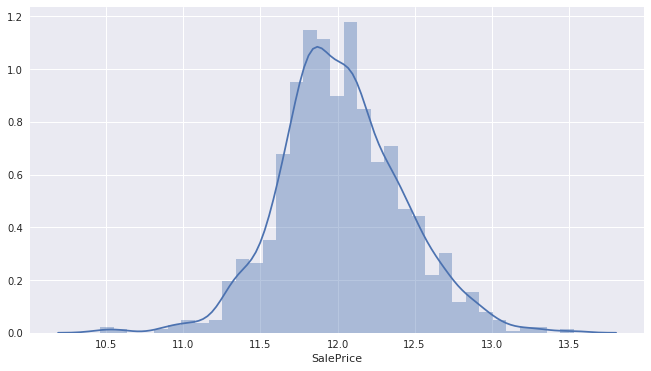

In [35]:
plt.figure(figsize = (11, 6))
sns.distplot(np.log(hp_data["SalePrice"]))

In [36]:
hp_data['Street'] = hp_data['Street'].apply(lambda x: 1 if x== 'Pave' else 0)
hp_data['CentralAir'] = hp_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
hp_data['PavedDrive'] = hp_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [37]:
cat_values = hp_data.select_dtypes(include=['object'])
cat_values.head(10)

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,No_Fireplace,Attchd,RFn,TA,TA,No_Pool,No_fence,None,WD,Normal
1,RL,No_Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_fence,None,WD,Normal
2,RL,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_fence,None,WD,Normal
3,RL,No_Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,No_Pool,No_fence,None,WD,Abnorml
4,RL,No_Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_fence,None,WD,Normal
5,RL,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,No_Fireplace,Attchd,Unf,TA,TA,No_Pool,MnPrv,Shed,WD,Normal
6,RL,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Attchd,RFn,TA,TA,No_Pool,No_fence,None,WD,Normal
7,RL,No_Alley,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_fence,Shed,WD,Normal
8,RM,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,TA,Detchd,Unf,Fa,TA,No_Pool,No_fence,None,WD,Abnorml
9,RL,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,...,TA,Attchd,RFn,Gd,TA,No_Pool,No_fence,None,WD,Normal


In [38]:
hp_dummies = pd.get_dummies(cat_values, drop_first=True)
hp_dummies.head(10)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
7,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [39]:
# Dropping few columns from data

df = hp_data.drop(['Id'], axis = 1)
df = df.drop(list(cat_values.columns), axis=1)

In [40]:
df = pd.concat([df, hp_dummies], axis = 1)
df.shape

(1460, 254)

In [41]:
#Training & Test, Scaling the data

df_train,df_test = train_test_split(df, train_size = 0.5, test_size =0.3, random_state = 100)

In [42]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice", 1)
y_test = np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice", 1)

In [43]:
data = X_train.select_dtypes(include=['int64', 'float64']).columns
data

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [44]:
Scaler = StandardScaler()
X_train[data] = Scaler.fit_transform(X_train[data])
X_test[data] = Scaler.transform(X_test[num_values])

NameError: name 'num_values' is not defined

In [ ]:
# Building the model & RFE

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

In [ ]:
rfe = RFE(reg_model, 20)
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
col

In [45]:
#Creating Model

X_train_new  = X_train[col]
X_train_new = sm.add_constant(X_train_new)

#Linear_Regression = lin_reg

lin_reg = sm.OLS(y_train, X_train_new)
lin_reg_model = lin_reg.fit()
lin_reg_model.summary()

KeyError: 'GarageCond'

In [46]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train, y_train)
y_train_prediction = ridge.predict(X_train)
y_test_prediction = ridge.predict(X_test)

print(r2_score(y_train, y_train_prediction))
print(r2_score(y_test, y_test_prediction))

0.9600778788078053
-8850375.118788254


The above value is not optimal for the ridge, and the oversetting is observed in the scores.

In [75]:
# Improving the model using GridSearchCV

folds = 5
params = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 5.0, 10.0]}
model = Ridge()
CV_model = GridSearchCV(estimator = model,
                        param_grid = params,
                        scoring = 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

CV_model.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 5.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [76]:
print(CV_model.best_params_)
print(CV_model.best_score_)

{'alpha': 10.0}
0.8199191305996368


In [49]:
cv_results = pd.DataFrame(CV_model.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043428,0.027451,0.007202,0.001863,0.001,{'alpha': 0.001},0.860895,0.906189,0.489044,0.804305,...,0.762313,0.146276,15,0.964968,0.962957,0.970569,0.963653,0.963150,0.965059,0.002843
1,0.009172,0.000780,0.009833,0.011423,0.01,{'alpha': 0.01},0.864962,0.908800,0.496481,0.818351,...,0.768198,0.145415,14,0.964881,0.962870,0.970524,0.963548,0.963059,0.964976,0.002861
2,0.009026,0.000229,0.004838,0.001480,0.1,{'alpha': 0.1},0.872230,0.909064,0.531069,0.837611,...,0.785194,0.134410,13,0.961902,0.959602,0.969411,0.960953,0.960951,0.962564,0.003501
3,0.015681,0.003466,0.007211,0.001549,0.2,{'alpha': 0.2},0.870630,0.900251,0.551715,0.838598,...,0.790664,0.124740,12,0.958184,0.955637,0.967904,0.958013,0.958013,0.959550,0.004282
4,0.008908,0.000027,0.004134,0.000049,0.3,{'alpha': 0.3},0.868417,0.892531,0.565973,0.838799,...,0.793648,0.117747,11,0.955048,0.952347,0.966416,0.955527,0.955351,0.956938,0.004878
5,0.015892,0.006034,0.005839,0.001671,0.4,{'alpha': 0.4},0.866543,0.886382,0.576618,0.839180,...,0.795712,0.112542,10,0.952447,0.949648,0.965029,0.953430,0.953047,0.954720,0.005322
6,0.018502,0.001413,0.007520,0.000689,0.5,{'alpha': 0.5},0.865074,0.881476,0.584931,0.839770,...,0.797313,0.108543,9,0.950264,0.947398,0.963761,0.951636,0.951056,0.952823,0.005659
7,0.014335,0.004036,0.008392,0.003262,0.6,{'alpha': 0.6},0.863953,0.877504,0.591631,0.840506,...,0.798636,0.105385,8,0.948402,0.945490,0.962605,0.950075,0.949322,0.951179,0.005921
8,0.010180,0.000221,0.012181,0.014071,0.7,{'alpha': 0.7},0.863108,0.874237,0.597161,0.841331,...,0.799773,0.102836,7,0.946789,0.943842,0.961551,0.948696,0.947794,0.949734,0.006130
9,0.012770,0.004229,0.006126,0.001736,0.8,{'alpha': 0.8},0.862480,0.871510,0.601814,0.842204,...,0.800777,0.100740,6,0.945371,0.942401,0.960587,0.947461,0.946435,0.948451,0.006299


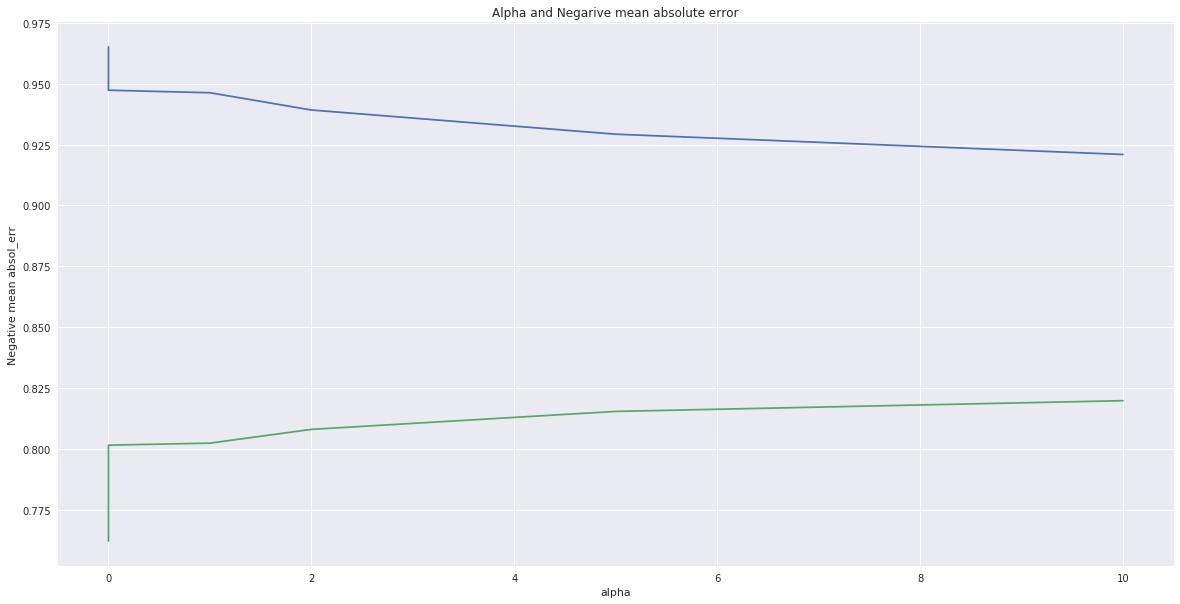

In [50]:
# Plotting the test and training scores

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(20, 10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])

plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative mean absol_err')
plt.title('Alpha and Negarive mean absolute error')
#plt.legend(['train_score', 'test_score'], loc = 'upper right')
plt.show()

In [77]:
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-2.05250115e-02,  9.55351598e-03,  1.11170193e-02,  7.68540347e-02,
        3.96956313e-02,  2.45399470e-02,  2.50774053e-02,  3.38421572e-04,
        2.79703453e-03,  1.20974146e-02,  3.73470108e-03,  1.07581652e-02,
        1.10827494e-02,  2.59188629e-02,  3.10343039e-02,  1.10620999e-03,
        4.44928956e-02,  2.27387077e-02,  3.35072821e-03,  1.67353158e-02,
        1.42279595e-02,  1.94587152e-02, -1.04068624e-02,  2.58701416e-02,
        1.31851734e-02, -4.06709621e-03,  4.94786479e-02,  2.57167312e-04,
        2.59205436e-03,  1.11695743e-02,  4.48190158e-03,  1.07804526e-02,
        1.09020997e-02,  1.32123611e-02, -1.28123636e-02,  2.56383514e-03,
        8.51114955e-04, -4.74476657e-03,  2.91961267e-02,  3.41197535e-02,
        3.27711882e-02, -1.48980964e-02,  5.89734108e-03,  2.33093069e-02,
        3.53763587e-02, -4.77341787e-02,  1.08001190e-02,  5.75069871e-02,
        2.35712487e-02,  4.94033019e-02,  0.00000000e+00,  4.07504646e-02,
       -3.48944527e-02, -

In [78]:
# Prediction of Test and R-Squared value

y_train_prediction = ridge.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_prediction))
y_test_prediction = ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_prediction))

0.915481085319211
-643390.2666063181


In [79]:
mean_squared_error(y_test, y_test_prediction)

105863.67398050759

LASSO REGRESSION

In [80]:
folds = 5
params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.5, 1.0 ]}
model_l = Lasso()
lasso_model = GridSearchCV(estimator = model_l,
                              param_grid = params, 
                              scoring = 'r2', 
                              cv = folds,
                              verbose = 1, 
                              return_train_score=True)

lasso_model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.5, 1.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [81]:
lasso_results = pd.DataFrame(lasso_model.cv_results_)


print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 0.0005}
0.8188820304229847


In [82]:
alpha = 0.00051
final_lasso_model = Lasso(alpha = alpha)
final_lasso_model.fit(X_train, y_train)

Lasso(alpha=0.00051)

In [83]:
# Lasso Prediction for the trained data(R2)

y_train_prediction_data = final_lasso_model.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_prediction_data))
y_test_prediction_data = final_lasso_model.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_prediction_data))

0.9388958077614618
-2111652.8304028357


In [84]:
mean_squared_error(y_test, y_test_prediction_data)

347451.76732130145

In [85]:
#final_lasso_model.coef_

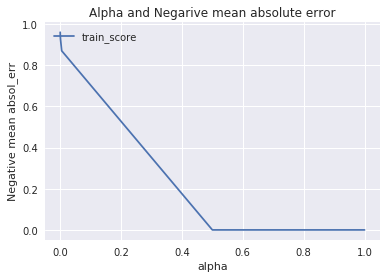

In [86]:
#Plotting training and test scores for lasso model

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
#plt.figure(figsize=(20, 10))
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])

#plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative mean absol_err')
plt.title('Alpha and Negarive mean absolute error')
plt.legend(['train_score', 'test_score'], loc = 'upper left')
plt.show()

In [87]:
lasso_model.best_params_

{'alpha': 0.0005}

In [93]:
ridge = Ridge(alpha = 10.0)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train, y_train_pred))
y_test_prediction = ridge.predict(X_test)
print(r2_score(y_test, y_test_prediction))

0.915481085319211
-643390.2666063181


In [94]:
param_model = list(ridge.coef_)
param_model.insert(0, ridge.intercept_)
col = df_train.columns
col.insert(0, 'constant')
ridge_coef = pd.DataFrame(list(zip(cols, param_model)))
ridge_coef.columns = ['Feature', 'coef']

In [95]:
ridge_coef.sort_values(by='coef', ascending = False). head()

,Feature,coef
0,SalePrice,11.710929
4,FullBath,0.076854
5,YearBuilt,0.039696
7,BsmtHalfBath,0.025077
6,TotalBsmtSF,0.024540


In [91]:
lasso= Lasso(alpha = 0.00051)
lasso.fit(X_train, y_train)
y_train_prediction = lasso.predict(X_train)
y_test_prediction = lasso.predict(X_test)

print(r2_score(y_true = y_train, y_pred = y_train_prediction))

print(r2_score(y_true = y_test, y_pred = y_test_prediction))

0.9388958077614618
-2111652.8304028357


Best alpha value for Ridge  = {'alpha': 10.0}
Best alpha value for Lasso  = {'alpha': 0.0005}

In [96]:
param_model = list(lasso.coef_)
param_model.insert(0, ridge.intercept_)
col = df_train.columns
col.insert(0, 'constant')
lasso_coef = pd.DataFrame(list(zip(cols, param_model)))
lasso_coef.columns = ['Feature', 'coef']



In [97]:
lasso_coef.sort_values(by='coef',ascending=False).head(10)

,Feature,coef
0,SalePrice,11.710929
4,FullBath,0.071320
5,YearBuilt,0.048511
6,TotalBsmtSF,0.047388
7,BsmtHalfBath,0.022897
2,GrLivArea,0.018263
3,GarageCars,0.014251
1,OverallQual,-0.014702
